TL;DR

They're different

In [1]:
from pyagnps import climate

from pathlib import Path

In [13]:
root_dir = Path("D:/AIMS/Datasets/Climate/CMIP/CMIP5/MACAv2METDATA/CNRM-CM5/r1i1p1/") #rcp45")

cmip5_files = root_dir.glob('**/*.nc')


In [14]:
clm_annagnps = climate.ClimateAnnAGNPSCoords(coords=(-89.1, 34.1), start="1980-01-01", end="1990-07-31", date_mode="local")

In [15]:
df_cmip = clm_annagnps.read_cmip5_maca_generate_annagnps_climate_daily(cmip5_files, output_filepath="cmip5_data.csv")


In [16]:
df_cmip

,Month,Day,Year,Max_Air_Temperature,Min_Air_Temperature,Precip,Dew_Point,Sky_Cover,Wind_Speed,Wind_Direction,Solar_Radiation,Storm_Type_ID,Potential_ET,Actual_ET,Actual_EI,Input_Units_Code
time,,,,,,,,,,,,,,,,
1980-01-01,1,1,1980,14.799194,9.089203,1.833010,4.038940,None,5.770844,315.270935,71.167160,None,NaN,None,None,1
1980-01-02,1,2,1980,16.187592,8.233643,12.896330,9.798737,None,7.536019,329.683929,43.049675,None,NaN,None,None,1
1980-01-03,1,3,1980,17.212494,5.237518,4.884128,4.130798,None,5.257843,68.901375,67.711319,None,NaN,None,None,1
1980-01-04,1,4,1980,6.599213,-2.751648,0.000000,-5.980835,None,5.840439,157.754684,111.358467,None,NaN,None,None,1
1980-01-05,1,5,1980,2.813110,-7.478149,0.000000,-9.215240,None,3.713441,212.411377,113.269989,None,NaN,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-07-27,7,27,1990,32.339661,21.808838,0.000000,22.344910,None,1.878413,101.166443,272.064758,None,NaN,None,None,1
1990-07-28,7,28,1990,32.912720,22.574219,0.000000,21.868347,None,2.886371,89.361885,253.695038,None,NaN,None,None,1
1990-07-29,7,29,1990,34.121063,21.919769,0.000000,21.170532,None,2.300974,115.951553,303.785400,None,NaN,None,None,1


In [17]:
df_nldas2 = clm_annagnps.query_nldas2_generate_annagnps_climate_daily(output_filepath= root_dir / "climate_daily.csv", float_format='%.2f')


In [18]:
from matplotlib import pyplot as plt

(132.0, 240.0)

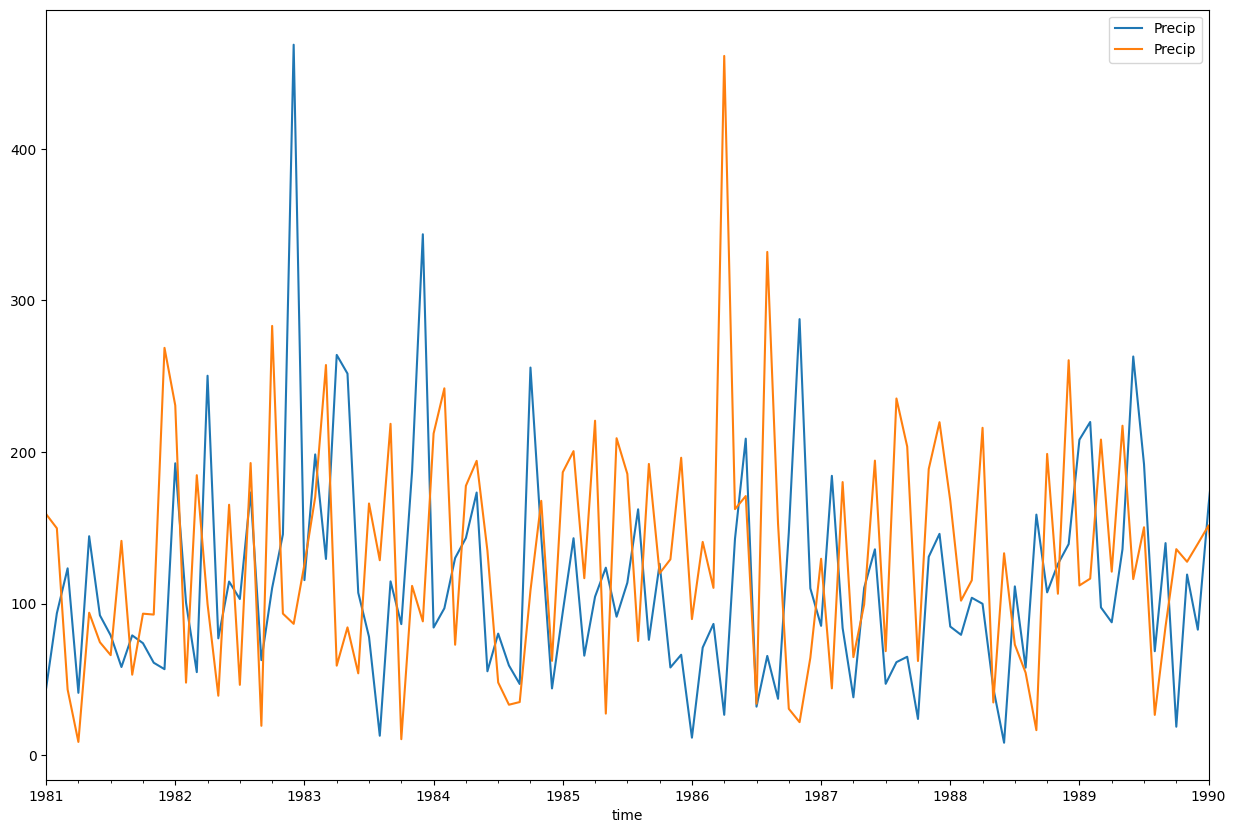

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

vars = ["Precip"]

# df_nldas2.to_period("M").agg('mean').plot(ax=ax, y=vars)
# df_cmip.to_period("M").agg('mean').plot(ax=ax, y=vars)

df_nldas2.resample("M").sum().plot(ax=ax, y=vars)
df_cmip.resample("M").sum().plot(ax=ax, y=vars)

# df_nldas2.plot(ax=ax, y=vars)
# df_cmip.plot(ax=ax, y=vars)

ax.set_xlim(["1981-01-01", "1990-01-01"])